<a href="https://colab.research.google.com/github/Eslam-Mohamed10/Code_Alpha_Machine_Learning_Hand_written_recognition/blob/main/Code_Alpha_Machine_Learning_Hand_written_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

In [4]:
# Reshape input to (28, 28, 1) for CNN
x_train = x_train.reshape((-1, 28, 28, 1))
x_test  = x_test.reshape((-1, 28, 28, 1))

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [6]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.7768 - loss: 0.6884 - val_accuracy: 0.9778 - val_loss: 0.0715
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.9644 - loss: 0.1140 - val_accuracy: 0.9865 - val_loss: 0.0434
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - accuracy: 0.9768 - loss: 0.0786 - val_accuracy: 0.9887 - val_loss: 0.0384
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9818 - loss: 0.0607 - val_accuracy: 0.9883 - val_loss: 0.0383
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9835 - loss: 0.0542 - val_accuracy: 0.9898 - val_loss: 0.0333


In [9]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9874 - loss: 0.0370
Test accuracy: 0.9901


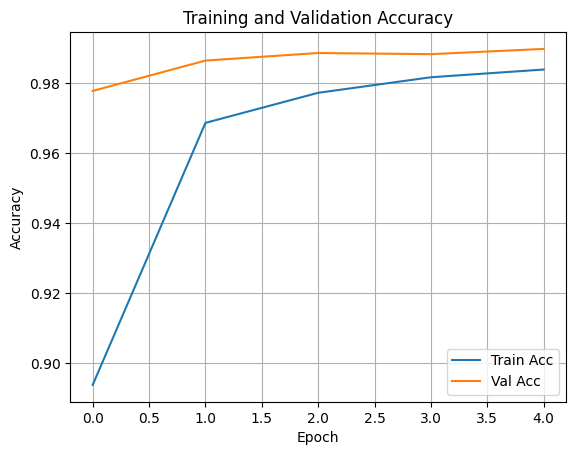

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()